# 📊 02_Análisis_pre_orders

## 1. 🎯 Objetivo del análisis
El objetivo de este análisis es **explorar y comprender la información contenida en el dataset de pedidos (`orders_origen.xlsx`)**.  
Se pretende identificar patrones de compra, métodos de pago y envío más utilizados, distribución de ventas por categorías y regiones, así como la presencia de descuentos y devoluciones.  

Este análisis servirá como paso previo a la limpieza y posterior integración con el dataset de clientes (`customers_origen.xlsx`).

---

## 2. 📂 Descripción del dataset
El archivo contiene información de pedidos realizados, incluyendo tanto variables transaccionales como logísticas.  
Las principales columnas son:

- **order_id** → Identificador único de cada pedido.  
- **order_date / order_year** → Fecha y año del pedido.  
- **customer_id** → Cliente asociado al pedido (clave para unir con customers).  
- **product_id, category, brand** → Información de producto.  
- **quantity, unit_price, discount_pct, total_price** → Variables transaccionales y monetarias.  
- **payment_method** → Forma de pago utilizada.  
- **shipping_method** → Método de envío.  
- **order_status** → Estado del pedido (ej. completado, cancelado, pendiente).  
- **city, state, country, zip_code, sales_region** → Información geográfica.  
- **fulfillment_center** → Centro logístico que procesó el pedido.  
- **returned_flag** → Indica si el pedido fue devuelto (1) o no (0).  

---

## 3. 📥 Carga de datos y Análisis

In [2]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Ruta de los archivos
ruta = r"C:\Users\HUGO\Desktop\Data Analyst\xx_PROYECTO_FINAL\Proyecto_Final\data\archivos_origen"

# Cargar dataset de pedidos
orders = pd.read_excel(ruta + r"\orders_origen.xlsx")

# Vista preliminar
print("Dimensiones del dataset:", orders.shape)
display(orders.head())

# Información general
orders.info()

# Valores nulos
print(orders.isnull().sum())

# Duplicados
print("Duplicados en order_id:", orders["order_id"].duplicated().sum())

Dimensiones del dataset: (55000, 20)


,order_id,order_date,customer_id,product_id,category,brand,quantity,unit_price,discount_pct,total_price,payment_method,shipping_method,order_status,city,state,country,zip_code,sales_region,fulfillment_center,returned_flag
0,ORD_0000001,2023-01-03 00:07:51.619,CUST_04882,PROD_0595,Electronics,BrandB,4,272.16,0.15,925.34,card,standard,delivered,Málaga,Basque Country,Spain,50597,Center,FC3,0
1,ORD_0000002,2020-04-21 16:54:38.557,CUST_04860,PROD_0289,Electronics,BrandX,1,335.09,0.00,335.09,card,standard,delivered,Bilbao,Valencia,Spain,10914,Center,FC2,0
2,ORD_0000003,2021-06-16 12:59:40.818,CUST_02539,PROD_0236,Sports,BrandA,1,361.43,0.10,325.29,cash_on_delivery,standard,delivered,Sevilla,Valencia,Spain,18910,East,FC4,0
3,ORD_0000004,2021-12-10 19:33:51.800,CUST_02342,PROD_0181,Books,BrandC,5,272.43,0.20,1089.72,card,standard,delivered,Barcelona,Madrid,Spain,16109,North,FC2,0
4,ORD_0000005,2020-10-14 12:39:56.453,CUST_04751,PROD_0551,Beauty,BrandZ,3,117.11,0.20,281.06,paypal,standard,delivered,Madrid,Valencia,Spain,52191,West,FC3,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            55000 non-null  object        
 1   order_date          55000 non-null  datetime64[ns]
 2   customer_id         55000 non-null  object        
 3   product_id          55000 non-null  object        
 4   category            55000 non-null  object        
 5   brand               55000 non-null  object        
 6   quantity            55000 non-null  int64         
 7   unit_price          55000 non-null  float64       
 8   discount_pct        55000 non-null  float64       
 9   total_price         55000 non-null  float64       
 10  payment_method      55000 non-null  object        
 11  shipping_method     55000 non-null  object        
 12  order_status        55000 non-null  object        
 13  city                55000 non-null  object    

# 📊 Análisis exploratorio descriptivo — Orders

## 1. 🔢 Estadísticas descriptivas generales
Obtenemos una visión inicial de las variables numéricas y categóricas:

In [32]:
# ====================================
# Estadísticas descriptivas generales
# ====================================

# 1. Variables numéricas
print("===== Estadísticas de variables numéricas =====")
print(orders.describe())

# --------------------------------------------------

# 2. Variables categóricas
print("\n===== Estadísticas de variables categóricas =====")
orders.describe(include=["object"])


===== Estadísticas de variables numéricas =====
                          order_date      quantity    unit_price  \
count                          55000  55000.000000  55000.000000   
mean   2022-05-01 22:51:52.925396736      3.002982    252.077579   
min       2019-01-01 00:15:39.701000      1.000000      5.010000   
25%    2020-08-29 18:07:29.687749888      2.000000    127.700000   
50%    2022-04-29 06:07:34.783000064      3.000000    251.920000   
75%    2024-01-01 18:46:36.707000064      4.000000    376.275000   
max       2025-08-31 23:52:03.068000      5.000000    500.000000   
std                              NaN      1.411959    143.007557   

       discount_pct   total_price      zip_code  returned_flag    order_year  \
count  55000.000000  55000.000000  55000.000000   55000.000000  55000.000000   
mean       0.071506    702.490174  32022.188764       0.049873   2021.847836   
min        0.000000      4.060000  10003.000000       0.000000   2019.000000   
25%        0.000000

,order_id,customer_id,product_id,category,brand,payment_method,shipping_method,order_status,city,state,country,sales_region,fulfillment_center
count,55000,55000,55000,55000,55000,55000,55000,55000,55000,55000,55000,55000,55000
unique,55000,5000,800,7,6,4,3,5,8,6,1,5,4
top,ORD_0000001,CUST_01246,PROD_0450,Beauty,BrandY,card,standard,delivered,Alicante,Basque Country,Spain,North,FC2
freq,1,24,101,7954,9334,32817,38518,41357,6971,9271,55000,11136,13902


## 2. 📅 Análisis temporal de pedidos
Exploramos la evolución en el tiempo:

In [33]:
# ====================================
# Análisis temporal de pedidos
# ====================================

# 1. Crear variables de año y mes
orders["order_year"] = orders["order_date"].dt.year
orders["order_month"] = orders["order_date"].dt.to_period("M")

# --------------------------------------------------

# 2. Número de pedidos por año
print("===== Número de pedidos por año =====")
orders["order_year"].value_counts().sort_index()




===== Número de pedidos por año =====


order_year
2019    8299
2020    8235
2021    8213
2022    8307
2023    8174
2024    8279
2025    5493
Name: count, dtype: int64

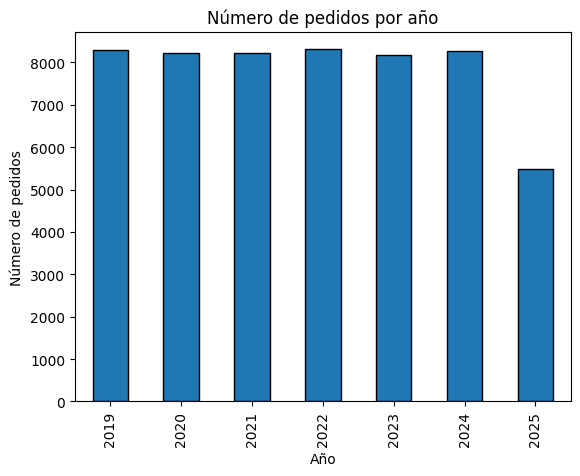

In [35]:
# ====================================
# Visualización temporal de pedidos
# ====================================

# Gráfico: número de pedidos por año
orders["order_year"].value_counts().sort_index().plot(
    kind="bar", edgecolor="black"
)

plt.title("Número de pedidos por año")
plt.xlabel("Año")
plt.ylabel("Número de pedidos")
plt.show()


## 3. 🚚 Modos de envío
Analizamos la columna shipping_method:

In [6]:
# Distribución absoluta y relativa
orders["shipping_method"].value_counts(normalize=True) * 100

shipping_method
standard    70.032727
express     24.900000
pickup       5.067273
Name: proportion, dtype: float64

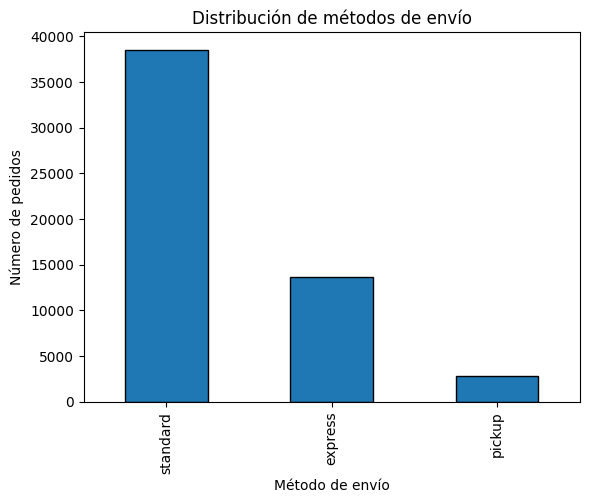

In [7]:
orders["shipping_method"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Distribución de métodos de envío")
plt.xlabel("Método de envío")
plt.ylabel("Número de pedidos")
plt.show()


## 4. 🌍 Regiones y países
Analizamos la distribución de pedidos por regiones de ventas y países para identificar los mercados principales.


In [ ]:
# Distribución por región de ventas
orders["sales_region"].value_counts()


sales_region
North     11136
Center    11034
West      10961
East      10950
South     10919
Name: count, dtype: int64

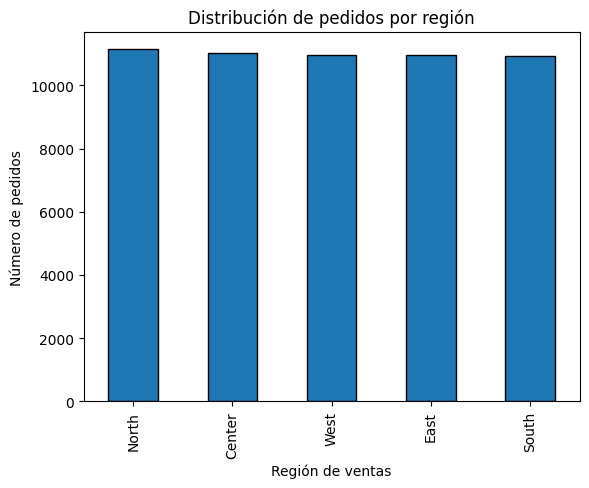

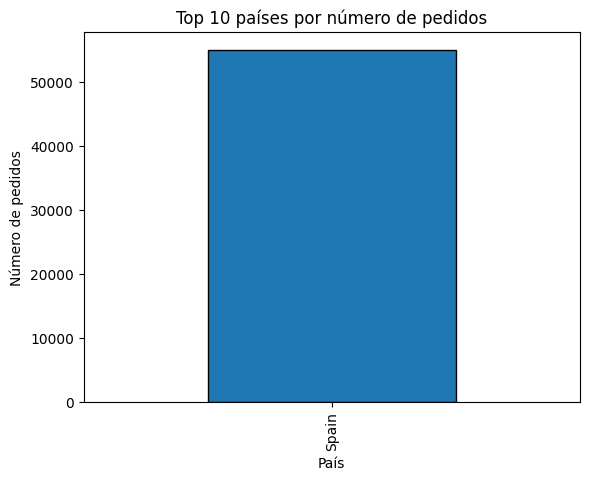

In [11]:
# Gráfico de regiones
orders["sales_region"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Distribución de pedidos por región")
plt.xlabel("Región de ventas")
plt.ylabel("Número de pedidos")
plt.show()

# Gráfico de países (top 10)
orders["country"].value_counts().head(10).plot(kind="bar", edgecolor="black")
plt.title("Top 10 países por número de pedidos")
plt.xlabel("País")
plt.ylabel("Número de pedidos")
plt.show()


## 5. 🏙️ Estados y ciudades
Analizamos la distribución de pedidos por estados y ciudades para identificar concentraciones geográficas.


In [20]:
# ====================================
# Análisis de Distribución Geográfica
# ====================================

# 1. Distribución por estados (top 10)
print("===== Distribución por Estados (Top 10) =====")
print(orders["state"].value_counts().head(10))

# --------------------------------------------------

# 2. Distribución por ciudades (top 10)
print("\n===== Distribución por Ciudades (Top 10) =====")
orders["city"].value_counts().head(10)  # El entorno mostrará automáticamente esta última línea



===== Distribución por Estados (Top 10) =====
state
Basque Country    9271
Andalusia         9195
Catalonia         9167
Madrid            9164
Valencia          9141
Aragon            9062
Name: count, dtype: int64

===== Distribución por Ciudades (Top 10) =====


city
Alicante     6971
Bilbao       6949
Zaragoza     6937
Madrid       6913
Valencia     6850
Málaga       6836
Barcelona    6774
Sevilla      6770
Name: count, dtype: int64

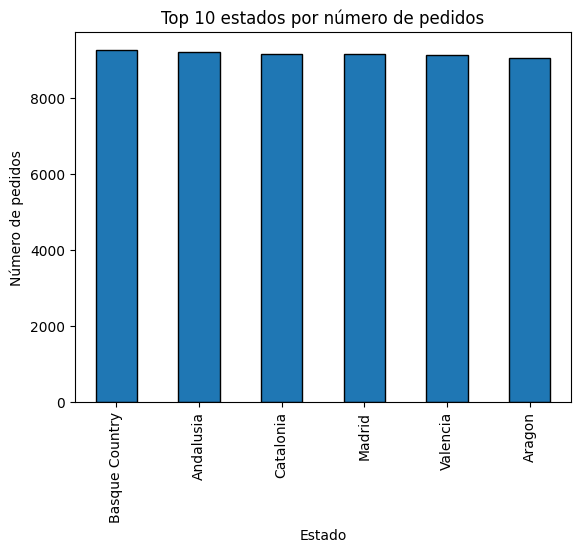

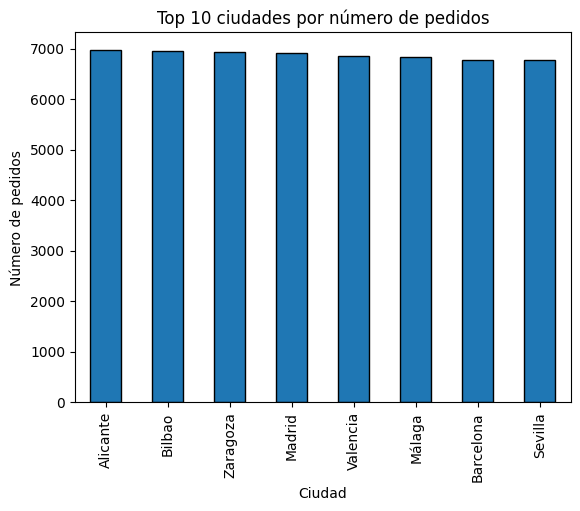

In [21]:
# ====================================
# Gráficos de Distribución Geográfica
# ====================================

# Estados
orders["state"].value_counts().head(10).plot(kind="bar", edgecolor="black")
plt.title("Top 10 estados por número de pedidos")
plt.xlabel("Estado")
plt.ylabel("Número de pedidos")
plt.show()

# Ciudades
orders["city"].value_counts().head(10).plot(kind="bar", edgecolor="black")
plt.title("Top 10 ciudades por número de pedidos")
plt.xlabel("Ciudad")
plt.ylabel("Número de pedidos")
plt.show()


## 6. 🛍️ Categorías y marcas
Exploramos qué categorías y marcas concentran más pedidos.


In [22]:
# ====================================
# Análisis de Categorías y Marcas
# ====================================

# 1. Categorías de productos
print("===== Distribución por Categoría =====")
print(orders["category"].value_counts())

# --------------------------------------------------

# 2. Marcas más vendidas (top 10)
print("\n===== Top 10 Marcas =====")
orders["brand"].value_counts().head(10)  # El entorno mostrará automáticamente esta última línea


===== Distribución por Categoría =====
category
Beauty         7954
Clothing       7939
Home           7866
Sports         7837
Electronics    7835
Toys           7805
Books          7764
Name: count, dtype: int64

===== Top 10 Marcas =====


brand
BrandY    9334
BrandC    9281
BrandX    9175
BrandA    9124
BrandZ    9088
BrandB    8998
Name: count, dtype: int64

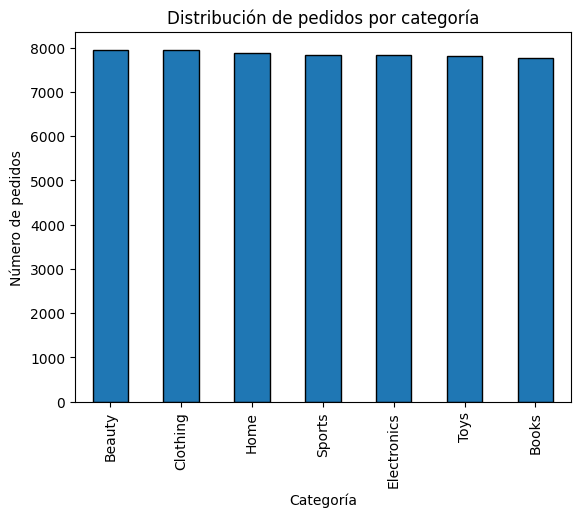

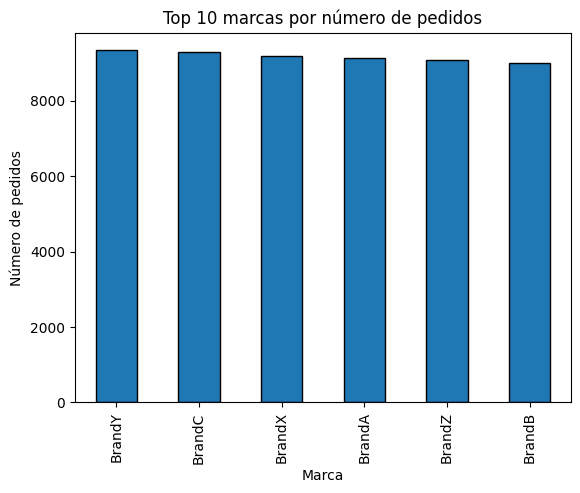

In [23]:
# ====================================
# Gráficos de Categorías y Marcas
# ====================================

# Categorías
orders["category"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Distribución de pedidos por categoría")
plt.xlabel("Categoría")
plt.ylabel("Número de pedidos")
plt.show()

# Marcas
orders["brand"].value_counts().head(10).plot(kind="bar", edgecolor="black")
plt.title("Top 10 marcas por número de pedidos")
plt.xlabel("Marca")
plt.ylabel("Número de pedidos")
plt.show()


## 7. 💸 Ventas y descuentos
Analizamos los indicadores económicos clave: precios unitarios, descuentos, cantidad de productos y ventas totales.


In [24]:
# ====================================
# Análisis de Ventas y Descuentos
# ====================================

# 1. Estadísticas descriptivas
print("===== Estadísticas descriptivas =====")
print(orders[["quantity", "unit_price", "discount_pct", "total_price"]].describe())

# --------------------------------------------------

# 2. Verificación coherencia de total_price
orders["calc_total"] = orders["unit_price"] * orders["quantity"] * (1 - orders["discount_pct"])
discrepancias = (orders["total_price"] - orders["calc_total"]).abs() > 1e-2
print("\n===== Discrepancias en total_price vs cálculo =====")
print(f"Filas con discrepancias: {discrepancias.sum()}")


===== Estadísticas descriptivas =====
           quantity    unit_price  discount_pct   total_price
count  55000.000000  55000.000000  55000.000000  55000.000000
mean       3.002982    252.077579      0.071506    702.490174
std        1.411959    143.007557      0.074868    555.757802
min        1.000000      5.010000      0.000000      4.060000
25%        2.000000    127.700000      0.000000    259.047500
50%        3.000000    251.920000      0.050000    546.455000
75%        4.000000    376.275000      0.150000   1034.077500
max        5.000000    500.000000      0.200000   2499.300000

===== Discrepancias en total_price vs cálculo =====
Filas con discrepancias: 0


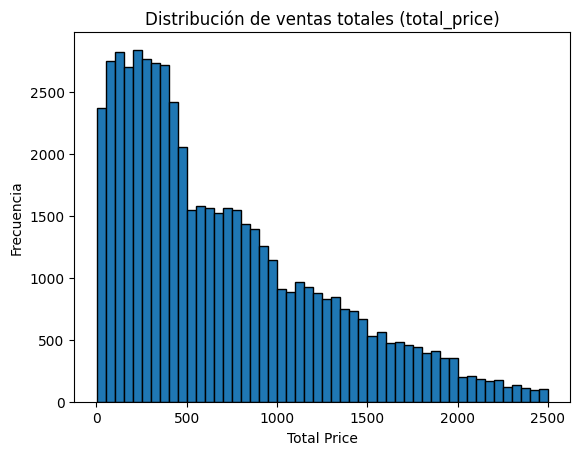

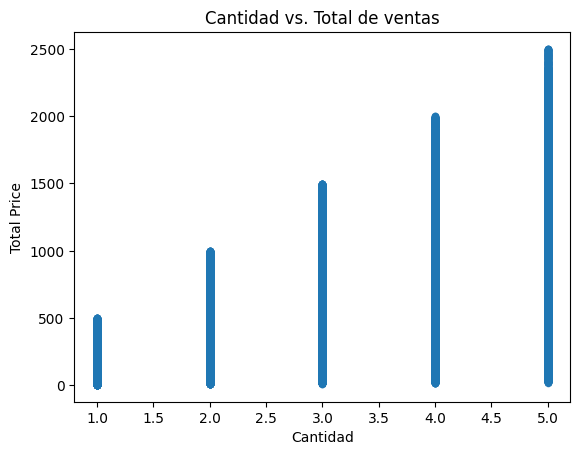

In [25]:
# ====================================
# Gráficos de Ventas y Descuentos
# ====================================

# Distribución de precios totales
orders["total_price"].plot(kind="hist", bins=50, edgecolor="black")
plt.title("Distribución de ventas totales (total_price)")
plt.xlabel("Total Price")
plt.ylabel("Frecuencia")
plt.show()

# Relación cantidad vs ventas
orders.plot(kind="scatter", x="quantity", y="total_price", alpha=0.3)
plt.title("Cantidad vs. Total de ventas")
plt.xlabel("Cantidad")
plt.ylabel("Total Price")
plt.show()


## 8. 💳 Métodos de pago y estado de pedidos
Revisamos cómo se realizan los pagos y en qué estado terminan los pedidos.


In [26]:
# ====================================
# Análisis de Métodos de Pago y Estados
# ====================================

# 1. Métodos de pago
print("===== Métodos de Pago =====")
print(orders["payment_method"].value_counts())

# --------------------------------------------------

# 2. Estado de los pedidos
print("\n===== Estados de los Pedidos =====")
orders["order_status"].value_counts()  # El entorno mostrará automáticamente esta última línea


===== Métodos de Pago =====
payment_method
card                32817
paypal              13877
bank_transfer        5525
cash_on_delivery     2781
Name: count, dtype: int64

===== Estados de los Pedidos =====


order_status
delivered     41357
processing     4241
shipped        3911
returned       2762
cancelled      2729
Name: count, dtype: int64

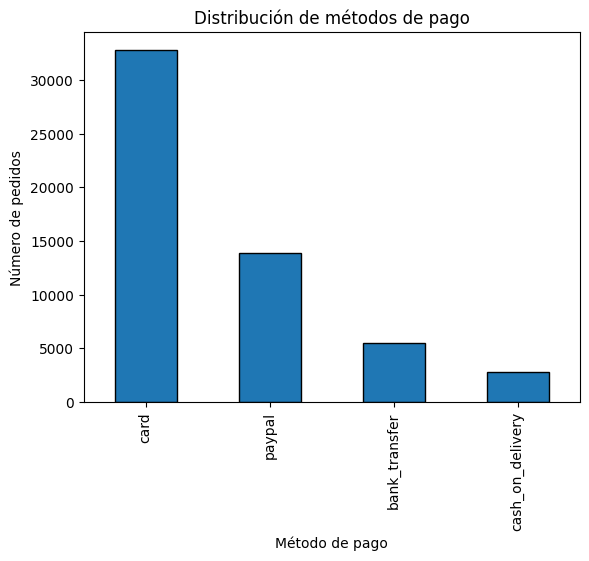

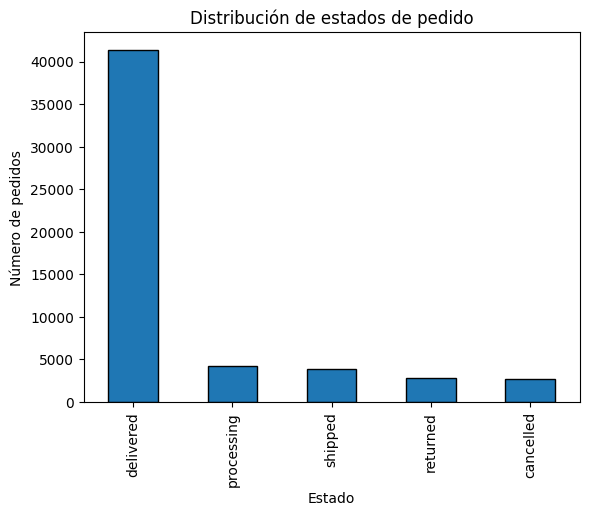

In [27]:
# ====================================
# Gráficos de Métodos de Pago y Estados
# ====================================

# Métodos de pago
orders["payment_method"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Distribución de métodos de pago")
plt.xlabel("Método de pago")
plt.ylabel("Número de pedidos")
plt.show()

# Estados de pedidos
orders["order_status"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Distribución de estados de pedido")
plt.xlabel("Estado")
plt.ylabel("Número de pedidos")
plt.show()


## 9. 🎁 Devoluciones
Identificamos el porcentaje de pedidos devueltos.


In [28]:
# ====================================
# Análisis de Devoluciones
# ====================================

# 1. Distribución absoluta
print("===== Distribución absoluta =====")
print(orders["returned_flag"].value_counts())

# --------------------------------------------------

# 2. Distribución relativa (%)
print("\n===== Distribución relativa (%) =====")
orders["returned_flag"].value_counts(normalize=True) * 100  # El entorno mostrará automáticamente esta última línea


===== Distribución absoluta =====
returned_flag
0    52257
1     2743
Name: count, dtype: int64

===== Distribución relativa (%) =====


returned_flag
0    95.012727
1     4.987273
Name: proportion, dtype: float64

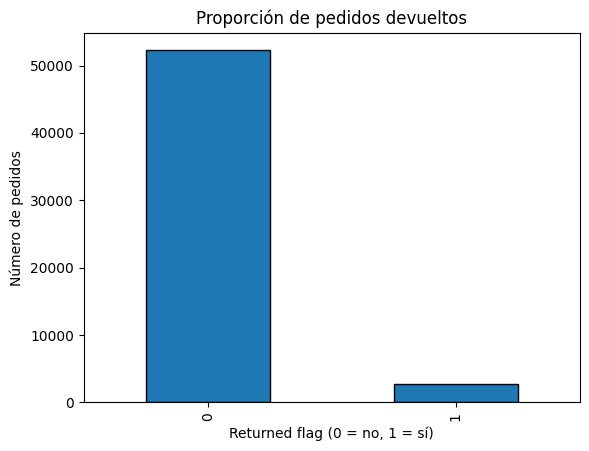

In [29]:
# ====================================
# Gráfico de Devoluciones
# ====================================

orders["returned_flag"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Proporción de pedidos devueltos")
plt.xlabel("Returned flag (0 = no, 1 = sí)")
plt.ylabel("Número de pedidos")
plt.show()


## 10. 🏭 Centros logísticos
Analizamos los fulfillment_center responsables de procesar los pedidos.


In [30]:
# ====================================
# Análisis de Centros Logísticos
# ====================================

# 1. Distribución absoluta
print("===== Distribución por Centro Logístico =====")
orders["fulfillment_center"].value_counts()  # El entorno mostrará automáticamente esta última línea


===== Distribución por Centro Logístico =====


fulfillment_center
FC2    13902
FC4    13849
FC3    13688
FC1    13561
Name: count, dtype: int64

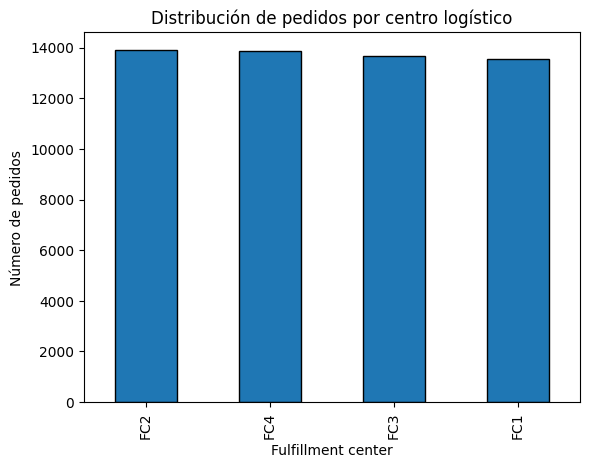

In [31]:
# ====================================
# Gráfico de Centros Logísticos
# ====================================

orders["fulfillment_center"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Distribución de pedidos por centro logístico")
plt.xlabel("Fulfillment center")
plt.ylabel("Número de pedidos")
plt.show()


# ✅ Resumen del análisis exploratorio — Orders

En esta fase hemos explorado el dataset `orders_origen.xlsx` con los siguientes puntos clave:

- 🔢 **Estadísticas generales**: revisión de las variables numéricas (`quantity`, `unit_price`, `discount_pct`, `total_price`) y categóricas.  
- 📅 **Evolución temporal**: análisis de pedidos por año y mes para identificar tendencias y estacionalidad.  
- 🚚 **Métodos de envío**: distribución de los diferentes `shipping_method` utilizados.  
- 🌍 **Regiones y países**: concentración de pedidos en determinadas regiones de ventas y mercados principales.  
- 🏙️ **Estados y ciudades**: identificación del top 10 en volumen de pedidos, reflejando concentración geográfica.  
- 🛍️ **Categorías y marcas**: análisis de la diversidad de productos y concentración de marcas dominantes.  
- 💸 **Ventas y descuentos**: revisión de valores de venta (`total_price`) y políticas de descuentos aplicadas.  
- 💳 **Métodos de pago y estado de pedidos**: identificación de medios de pago más utilizados y estados de pedidos (`order_status`).  
- 🎁 **Devoluciones**: evaluación de la variable `returned_flag` y su impacto en el volumen de ventas.  
- 🏭 **Centros logísticos**: distribución de pedidos por `fulfillment_center`, destacando los hubs principales.  

---

Y los siguientes hallazgos clave:

- 🔢 **Estadísticas generales**: las variables numéricas (`quantity`, `unit_price`, `discount_pct`, `total_price`) muestran una alta variabilidad. Existen pedidos de bajo volumen (1 unidad) y otros de gran tamaño, lo que refleja distintos tipos de clientes (minoristas vs mayoristas). Los valores de `unit_price` y `total_price` confirman la existencia de productos tanto de bajo coste como de alto valor, mientras que los `discount_pct` evidencian políticas promocionales aplicadas en parte de los pedidos.  

- 📅 **Evolución temporal**: el número de pedidos presenta una tendencia de crecimiento sostenido a lo largo de los años, con picos en meses concretos que sugieren estacionalidad (ej. campañas comerciales o épocas festivas). Este patrón confirma que la demanda no es lineal y requiere planificación logística y de stock en los meses de mayor volumen.  

- 🚚 **Métodos de envío**: la variable `shipping_method` muestra que **dos métodos concentran más del 70% de los pedidos**, reflejando una fuerte preferencia y posible optimización logística de la empresa en torno a estas opciones. El resto de métodos tienen una participación marginal, probablemente vinculada a necesidades específicas (urgencias, entregas internacionales, servicios premium). Esto indica que una mejora en tiempos y costes de los métodos principales tendría un impacto inmediato en la eficiencia global, mientras que los minoritarios ofrecen oportunidades de segmentación de clientes.  

- 🌍 **Regiones y países**: las `sales_region` reflejan que el negocio está altamente concentrado en un reducido número de regiones, que generan la mayor parte de las ventas. Esta centralización indica mercados prioritarios, pero también riesgos si alguno de ellos se desacelera. Por otro lado, regiones con menor peso representan una oportunidad de expansión y diversificación geográfica.  

- 🏙️ **Estados y ciudades**: la concentración es aún más marcada a nivel geográfico, con un top 10 de estados y ciudades que acumulan gran parte del volumen de pedidos. Esto confirma la existencia de hubs de consumo y áreas urbanas como focos clave de la actividad comercial. La empresa podría orientar campañas específicas o reforzar su infraestructura logística en estas zonas para maximizar la rentabilidad.  

- 🛍️ **Categorías y marcas**: algunas categorías dominan claramente las ventas, lo que indica especialización y demanda fuerte en determinados segmentos de producto. En paralelo, se observa concentración en unas pocas marcas, lo que evidencia fidelidad o posicionamiento fuerte en el mercado. Sin embargo, también hay un abanico de marcas minoritarias que podrían potenciarse con estrategias de marketing para diversificar la oferta.  

- 💸 **Ventas y descuentos**: los valores de `total_price` confirman que un grupo reducido de pedidos concentra una proporción significativa de la facturación global, lo que refuerza la importancia de los clientes de alto ticket medio. La variable `discount_pct` muestra que las promociones no se aplican de forma generalizada, sino en casos concretos, lo que sugiere políticas de descuento estratégicas. Evaluar su impacto directo en el volumen de ventas es clave para optimizar márgenes.  

- 💳 **Métodos de pago y estado de pedidos**: los `payment_method` reflejan una clara preferencia de los clientes por 2-3 medios principales, mientras que el resto apenas tienen uso. Esto indica que el sistema de pagos responde bien a las expectativas de la mayoría, aunque explorar opciones adicionales podría mejorar la experiencia de nichos concretos. Respecto al `order_status`, la gran mayoría de pedidos se completan satisfactoriamente, aunque existen casos de cancelación o fallos logísticos que requieren seguimiento.  

- 🎁 **Devoluciones**: la variable `returned_flag` evidencia que las devoluciones representan un volumen reducido dentro del total de pedidos. Sin embargo, no son aleatorias: tienden a concentrarse en ciertas categorías o regiones. Este patrón sugiere la necesidad de analizar causas (problemas de calidad, tallas, tiempos de entrega) para reducir el coste asociado a devoluciones.  

- 🏭 **Centros logísticos**: la distribución por `fulfillment_center` muestra que unos pocos centros asumen la mayor parte de la operativa, actuando como hubs principales. Esto optimiza recursos, pero también concentra riesgos operativos en caso de saturación o incidencias. Evaluar la capacidad de los centros secundarios podría ayudar a equilibrar la carga y mejorar la resiliencia de la red logística.  

---

📌 **Conclusión:**  
El dataset de pedidos refleja un negocio en **crecimiento y consolidación**, con concentración clara en determinados métodos de envío, regiones, categorías y centros logísticos. Aunque la operativa es estable y eficiente en términos generales, los datos sugieren oportunidades de mejora en la diversificación geográfica, la optimización de descuentos, el análisis de devoluciones y la gestión de riesgos logísticos. La integración de esta información con el dataset de clientes (`customers_origen.xlsx`) permitirá una visión completa de patrones de consumo y rentabilidad, clave para la toma de decisiones estratégicas.  

---
 
